# Lab5-1_BA

## Berent Aldikacti

## 09/21/20

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Exercise

In [2]:
df = pd.read_csv("data/bouldercreek_09_2013.txt", skiprows=25, sep='\t')

In [3]:
df.head()

,agency_cd,site_no,datetime,tz_cd,04_00060,04_00060_cd
0,5s,15s,20d,6s,14n,10s
1,USGS,06730200,2013-09-01 00:00,MDT,57,A
2,USGS,06730200,2013-09-01 00:15,MDT,57,A
3,USGS,06730200,2013-09-01 00:30,MDT,57,A
4,USGS,06730200,2013-09-01 00:45,MDT,57,A


In [4]:
df.shape

(2876, 6)

In [5]:
df2 = df.iloc[1:2876,2:5].copy()
df2

,datetime,tz_cd,04_00060
1,2013-09-01 00:00,MDT,57
2,2013-09-01 00:15,MDT,57
3,2013-09-01 00:30,MDT,57
4,2013-09-01 00:45,MDT,57
5,2013-09-01 01:00,MDT,57
...,...,...,...
2871,2013-09-30 22:45,MDT,334
2872,2013-09-30 23:00,MDT,334
2873,2013-09-30 23:15,MDT,334
2874,2013-09-30 23:30,MDT,334


### Challenge - Drawing from distributions

Have a look at numpy.random documentation. Choose a distribution you have no familiarity with, and try to sample from and visualize it.

In [6]:
from numpy.random import default_rng
rng = default_rng()

dh = np.random.default_rng().dirichlet((10, 5, 3), 20).transpose()
dh

array([[0.69139515, 0.33628165, 0.50896079, 0.48978917, 0.71851791,
        0.62106609, 0.54926603, 0.54383846, 0.68054066, 0.29033301,
        0.4905586 , 0.61247977, 0.67914497, 0.5660154 , 0.39073592,
        0.63397258, 0.60255503, 0.7469851 , 0.51927079, 0.51035139],
       [0.16706423, 0.51045099, 0.20512863, 0.35144539, 0.13015156,
        0.28168942, 0.14335136, 0.28029949, 0.22528868, 0.47577264,
        0.22189668, 0.19227872, 0.12888257, 0.28852352, 0.49553699,
        0.22838989, 0.24041696, 0.07902811, 0.30911865, 0.23969732],
       [0.14154062, 0.15326735, 0.28591058, 0.15876544, 0.15133053,
        0.09724449, 0.3073826 , 0.17586205, 0.09417066, 0.23389435,
        0.28754473, 0.19524151, 0.19197246, 0.14546108, 0.1137271 ,
        0.13763753, 0.15702801, 0.17398678, 0.17161055, 0.24995129]])

Text(0.5, 1.0, 'Lengths of Strings')

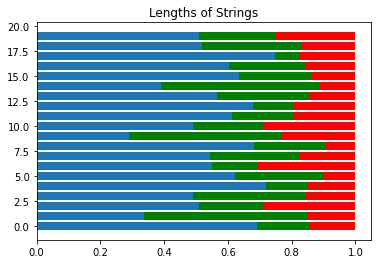

In [7]:
plt.barh(range(20), dh[0])
plt.barh(range(20), dh[1], left=dh[0], color='g')
plt.barh(range(20), dh[2], left=dh[0] + dh[1], color='r')
plt.title("Lengths of Strings")

### Challenge - Pandas and Matplotlib

Load the streamgage data set with Pandas, subset the week of the 2013 Front Range flood (September 11 through 15) and create a hydrograph (line plot) of the discharge data using Pandas, linking it to an empty maptlotlib ax object. Create a second axis that displays the whole dataset. Adapt the title and axes’ labels using matplotlib.

Text(0.5, 1.0, ' Front Range flood event 2013')

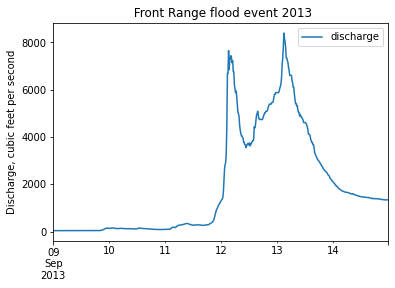

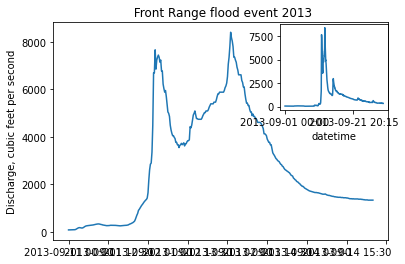

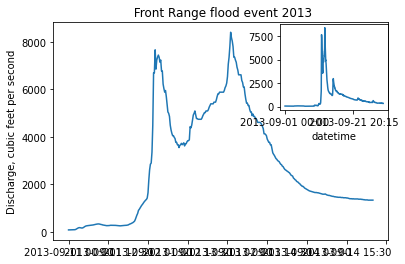

In [8]:
discharge = pd.read_csv("data/bouldercreek_09_2013.txt",
                        skiprows=27, delimiter="\t",
                        names=["agency", "site_id", "datetime",
                               "timezone", "discharge", "discharge_cd"])
discharge["datetime"] = pd.to_datetime(discharge["datetime"])
front_range = discharge[(discharge["datetime"] >= "2013-09-09") &
                        (discharge["datetime"] < "2013-09-15")]

fig, ax = plt.subplots()
front_range.plot(x ="datetime", y="discharge", ax=ax)
ax.set_xlabel("") # no label
ax.set_ylabel("Discharge, cubic feet per second")
ax.set_title(" Front Range flood event 2013")


discharge = pd.read_csv("data/bouldercreek_09_2013.txt",
                      skiprows=27, delimiter="\t",
                      names=["agency", "site_id", "datetime",
                             "timezone", "flow_rate", "height"])
fig, ax = plt.subplots()
flood = discharge[(discharge["datetime"] >= "2013-09-11") &
                  (discharge["datetime"] < "2013-09-15")]

ax2 = fig.add_axes([0.65, 0.575, 0.25, 0.3])
flood.plot(x ="datetime", y="flow_rate", ax=ax)
discharge.plot(x ="datetime", y="flow_rate", ax=ax2)
ax2.legend().set_visible(False)
ax.set_xlabel("") # no label
ax.set_ylabel("Discharge, cubic feet per second")
ax.legend().set_visible(False)
ax.set_title(" Front Range flood event 2013")


discharge = pd.read_csv("data/bouldercreek_09_2013.txt",
                      skiprows=27, delimiter="\t",
                      names=["agency", "site_id", "datetime",
                             "timezone", "flow_rate", "height"])
fig, ax = plt.subplots()
flood = discharge[(discharge["datetime"] >= "2013-09-11") &
                  (discharge["datetime"] < "2013-09-15")]

ax2 = fig.add_axes([0.65, 0.575, 0.25, 0.3])
flood.plot(x ="datetime", y="flow_rate", ax=ax)
discharge.plot(x ="datetime", y="flow_rate", ax=ax2)
ax2.legend().set_visible(False)

ax.set_xlabel("") # no label
ax.set_ylabel("Discharge, cubic feet per second")
ax.legend().set_visible(False)
ax.set_title(" Front Range flood event 2013")

### Challenge - Saving figures

Check the documentation of the savefig method and check how you can comply to journals requiring figures as pdf file with dpi >= 300.

In [11]:
fig.savefig?

Signature: fig.savefig(fname, *, transparent=None, **kwargs)
Docstring:
Save the current figure.

Call signature::

  savefig(fname, dpi=None, facecolor='w', edgecolor='w',
          orientation='portrait', papertype=None, format=None,
          transparent=False, bbox_inches=None, pad_inches=0.1,
          frameon=None, metadata=None)

The available output formats depend on the backend being used.

Parameters
----------
fname : str or path-like or file-like
    A path, or a Python file-like object, or
    possibly some backend-dependent object such as
    `matplotlib.backends.backend_pdf.PdfPages`.

    If *format* is set, it determines the output format, and the file
    is saved as *fname*.  Note that *fname* is used verbatim, and there
    is no attempt to make the extension, if any, of *fname* match
    *format*, and no extension is appended.

    If *format* is not set, then the format is inferred from the
    extension of *fname*, if there is one.  If *format* is not
    set and

In [10]:
fig.savefig("figure1.pdf",dpi=300,)

### Challenge - Final Plot

Display your data using one or more plot types from the example gallery. Which ones to choose will depend on the content of your own data file. If you are using the streamgage file bouldercreek_09_2013.txt, you could make a histogram of the number of days with a given mean discharge, use bar plots to display daily discharge statistics, or explore the different ways matplotlib can handle dates and times for figures.

In [75]:
discharge = pd.read_csv("data/bouldercreek_09_2013.txt",
                        skiprows=27, delimiter="\t",
                        names=["agency", "site_id", "datetime",
                               "timezone", "discharge", "discharge_cd"])

In [70]:
discharge.head()

,agency,site_id,datetime,timezone,discharge,discharge_cd
0,USGS,6730200,2013-09-01 00:00:00,MDT,57,A
1,USGS,6730200,2013-09-01 00:15:00,MDT,57,A
2,USGS,6730200,2013-09-01 00:30:00,MDT,57,A
3,USGS,6730200,2013-09-01 00:45:00,MDT,57,A
4,USGS,6730200,2013-09-01 01:00:00,MDT,57,A


In [83]:
disp = discharge.groupby(['discharge'])['datetime'].count().reset_index(name='datetime')
disp
disp['discharge'] = disp['discharge'].astype(object)

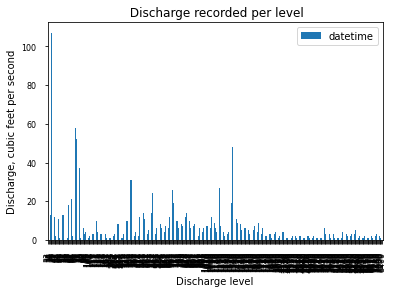

In [93]:
fig, ax = plt.subplots()
disp.plot(x='discharge',y='datetime' ,kind='bar',stacked=True, ax=ax)
ax.set_xlabel("Discharge level") # no label
ax.set_ylabel("Discharge, cubic feet per second")
ax.set_title(" Discharge recorded per level")
ax.tick_params(labelsize=8, pad=8)

In [92]:
fig.savefig("figure2.pdf",dpi=300,)